In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.arima_model import ARMA,ARIMA,ARMAResults,ARIMAResults

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
from pmdarima import auto_arima

In [5]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [6]:
df2 = pd.read_csv('../Data/TradeInventories.csv', index_col='Date',parse_dates=True)
df2.index.freq = 'MS'

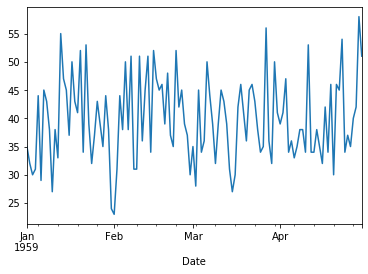

In [7]:
df1['Births'].plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
test = adfuller(df1['Births'])

In [10]:
test

(-9.855384093160584,
 4.373545405991154e-17,
 0,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 723.9921310744033)

In [11]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sat, 08 Feb 2020   AIC                            823.489
Time:                        09:03:48   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [13]:
model = ARMA(train['Births'],order=(2,2))

In [14]:
results = model.fit()

In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 08 Feb 2020   AIC                            627.809
Time:                        09:11:15   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7433           +0.0000j            1.7433            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [16]:
start = len(train)
end = len(train) + len(test) -1

In [17]:
predictions = results.predict(start, end).rename('ARMA(2,2)')

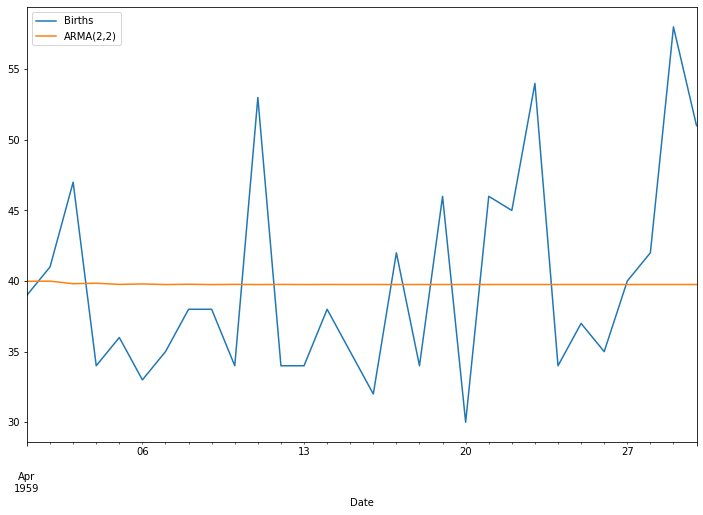

In [21]:
test['Births'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)

In [22]:
test.mean()

Births    39.833333
dtype: float64

In [23]:
predictions.mean()

39.777431317920204

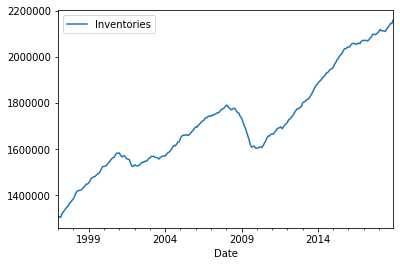

In [24]:
df2.plot()

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

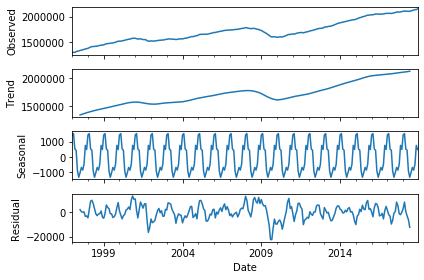

In [26]:
result = seasonal_decompose(df2['Inventories'],model='add')
result.plot();

In [27]:
auto_arima(df2['Inventories'],seasonal=False).summary()

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  264
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2672.018
Date:                Sat, 08 Feb 2020   AIC                           5348.037
Time:                        09:20:19   BIC                           5355.181
Sample:                             0   HQIC                          5350.908
                                - 264                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3258.3802    470.991      6.918      0.000    2335.255    4181.506
sigma2       3.91e+07   2.95e+06     13.250      0.000    3.33e+07    4.49e+07
===================================================================================
Ljung-Box (Q):                      455.75   Jarque-Bera (JB):               100.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -1.15
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
from statsmodels.tsa.statespace.tools import diff

In [29]:
df2['Diff_1'] = diff(df2['Inventories'],k_diff=1)

In [31]:
adfuller(df2['Diff_1'].dropna())

(-3.412249391934806,
 0.010548311489190432,
 4,
 258,
 {'1%': -3.455952927706342,
  '5%': -2.8728086526320302,
  '10%': -2.572774990685656},
 4888.3029144158)

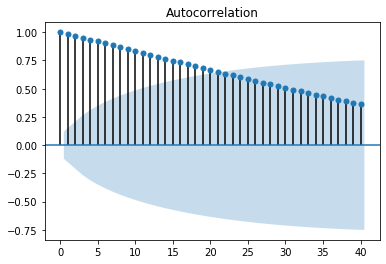

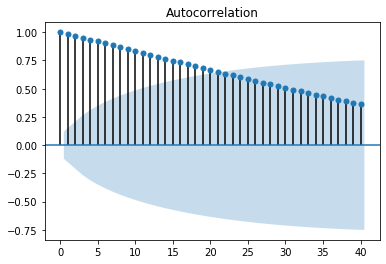

In [32]:
plot_acf(df2['Inventories'],lags=40)

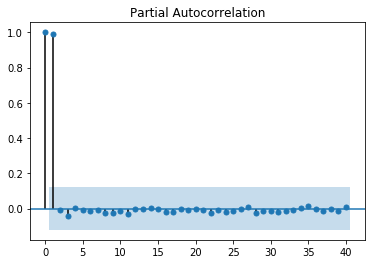

In [33]:
plot_pacf(df2['Inventories'],lags=40);

In [34]:
train = df2.iloc[:252]
test = df2.iloc[252:]

In [36]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.394
Method:                       css-mle   S.D. of innovations           4845.004
Date:                Sat, 08 Feb 2020   AIC                           4980.788
Time:                        09:42:34   BIC                           4994.889
Sample:                    02-01-1997   HQIC                          4986.463
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3244.6344   1345.033      2.412      0.017     608.418    5880.851
ar.L1.D.Inventories     0.9026      0.039     23.012      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1079           +0.0000j            1.1079            0.0000
MA.1            1.7917           +0.0000j            1.7917            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start,end,typ='levels').rename('ARIMA(1,1,1))')

In [38]:
predictions

2018-01-01    2.107159e+06
2018-02-01    2.110550e+06
2018-03-01    2.113928e+06
2018-04-01    2.117292e+06
2018-05-01    2.120645e+06
2018-06-01    2.123988e+06
2018-07-01    2.127320e+06
2018-08-01    2.130645e+06
2018-09-01    2.133961e+06
2018-10-01    2.137270e+06
2018-11-01    2.140574e+06
2018-12-01    2.143871e+06
Freq: MS, Name: ARIMA(1,1,1)), dtype: float64

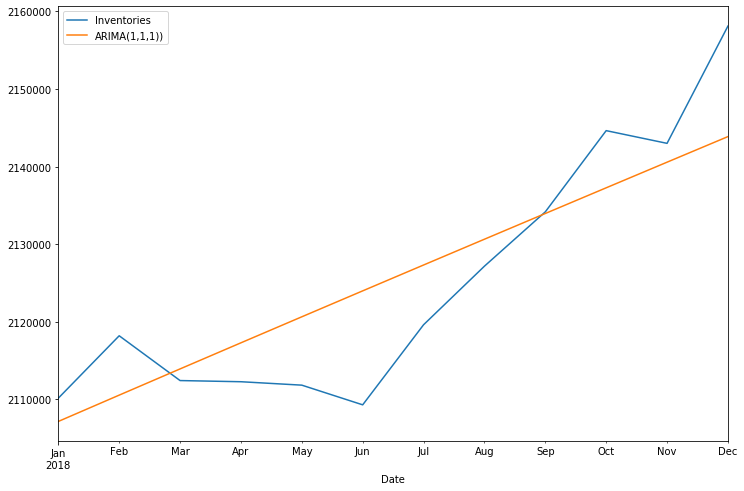

In [39]:
test['Inventories'].plot(legend=True,figsize=(12,8))
predictions.plot(legend=True)

In [40]:
from statsmodels.tools.eval_measures import rmse

In [41]:
error = rmse(test['Inventories'],predictions)

In [42]:
error

7761.236748246942

In [43]:
test['Inventories'].mean()

2125075.6666666665

In [44]:
predictions.mean()

2125600.2836019606

In [45]:
model = ARIMA(df2['Inventories'],order=(1,1,1))

In [46]:
results = model.fit()

In [47]:
fcast = results.predict(start=len(df2),end=len(df2)+11, typ='levels').rename('ARIMA(1,1,1)')

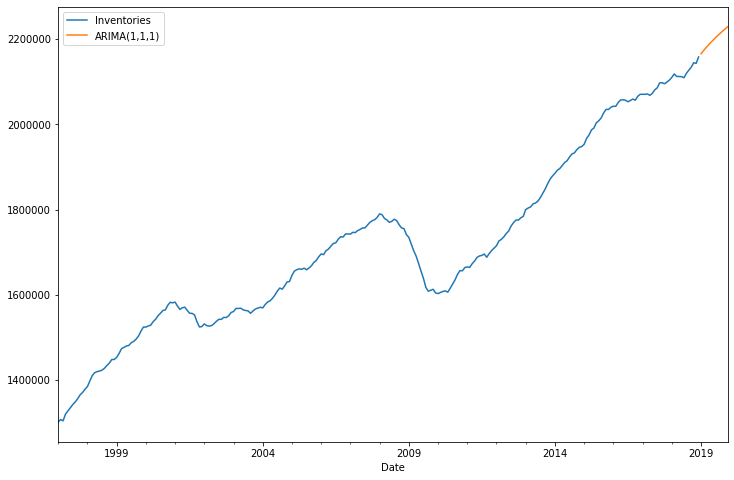

In [50]:
df2['Inventories'].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)